# 2nd EDA

##### todos defined in previous notebook "Feature Engineering"

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fp = pd.read_csv("data/fp_data_fe.csv", index_col=0)
df_gk = pd.read_csv("data/gk_data_fe.csv", index_col=0)
pd.set_option('display.max_columns', None)

## Truncate Dataframe

In [3]:
df_fp = df_fp.rename(columns={'market_value_€': 'market_value_in_euro'})
df_gk = df_gk.rename(columns={'market_value_€': 'market_value_in_euro'})

In [4]:
def detect_outlier(df, feature):
    
    outliers=[]
    # standard threshold is 3
    threshold=3
    mean = df[f"{feature}"].mean()
    std = df[f"{feature}"].std()
    
    
    for i in df[f"{feature}"]:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    print ("For feature","\033[1m" + feature + "\033[0m","there are outliers:")
    print (len(outliers))
    print ("Truncate dataframe at:")
    print (min(outliers))

In [5]:
print(df_fp.shape)
detect_outlier (df_fp, "market_value_in_euro")

(10979, 61)
For feature market_value_in_euro there are outliers:
232
Truncate dataframe at:
27000000.0


In [6]:
print(df_gk.shape)
detect_outlier (df_gk, "market_value_in_euro")

(1404, 44)
For feature market_value_in_euro there are outliers:
17
Truncate dataframe at:
17500000.0


In [7]:
df_fp = df_fp.query("market_value_in_euro < 27000000")
print(df_fp.shape)

(10747, 61)


In [8]:
df_gk = df_gk.query("market_value_in_euro < 17500000")
print(df_gk.shape)

(1387, 44)


##### use functions from 1st EDA again

In [9]:
def plot_hist(df, feature, title):
    
    feature_mean = round(df[f"{feature}"].mean()).astype("int64")
    feature_median = round(df[f"{feature}"].median()).astype("int64")

    plt.figure(figsize=(15,5))

    ax = sns.distplot(df[f"{feature}"], bins = 20, kde=False)

    plt.ticklabel_format(style='plain', axis='x')
    ax.tick_params(labelsize=14)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.axvline(feature_mean, color='b', linestyle='dashed', linewidth=2, ymax=0.95, label="Mean")
    plt.axvline(feature_median, color='k', linestyle='dashed', linewidth=2, ymax=0.95, label="Median")

    ax.set_ylabel("count", fontsize = 16)
    ax.set_xlabel(f"{feature}", fontsize = 16)
    ax.set_title(f"{title}",fontsize = 20)
    
    ### text box, for fast visualisation of key values
    
    # defining key values for texr box
    min_value = round(df[f"{feature}"].min()).astype("int64")
    max_value = round(df[f"{feature}"].max()).astype("int64")
    mean_value = round(df[f"{feature}"].mean()).astype("int64")
    median_value = round(df[f"{feature}"].median()).astype("int64")
    
    # put key values in joined text-string
    textstr = '\n'.join((
        f"min value = {min_value:0,}",
        f"max value = {max_value:0,}",
        f"mean value = {mean_value:0,}",
        f"median value = {median_value:0,}"))
    
    # define box style
    props = dict(boxstyle='round', facecolor='blue', alpha=0.2)

    # place text box on the right with x and y coordinates
    ax.text(0.75, 0.6, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='center', bbox=props)

    
    if feature == "market_value_€":
        
        import matplotlib.ticker as plticker
        
        plt.xticks(rotation='vertical')

        #set tick every 10 Mio €
        tick_spacing = 10000000
        loc = plticker.MultipleLocator(tick_spacing)
        ax.xaxis.set_major_locator(loc)
        
        plt.legend(prop={'size': 15})
        plt.show();
    
    else:
        plt.legend(prop={'size': 15})
        plt.show();

In [10]:
def plot_count_cat(df, feature):
    sns.set(style="darkgrid")
    
    fig, ax = plt.subplots(figsize=(15,5))
    sns.countplot(x=f"{feature}", alpha=0.7, data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [11]:
def plot_heatmap (data):
    
    corrmat = data.corr()
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(16, 10))
        ax.xaxis.tick_top() 
        cmap = sns.color_palette("RdBu_r", 10)
        matrix = np.tril(corrmat)
        
    if len(data.columns) < 15:
    
        sns.set(context="paper", font="monospace", font_scale=2)

        with sns.axes_style("white"):
            heatmap = sns.heatmap(corrmat[(corrmat >= 0.7) | (corrmat <= -0.4)], 
                                  cmap=cmap, vmin=-1, vmax=1, center= 0, square=True, annot=True, 
                                  annot_kws={"size": 12}, fmt='.2g', mask=matrix, linewidths=1, rasterized=True);
    
    elif len(data.columns) <= 30:
        
        sns.set(context="paper", font="monospace", font_scale=1.5)
        
        with sns.axes_style("white"):
            heatmap = sns.heatmap(corrmat[(corrmat >= 0.7) | (corrmat <= -0.4)], 
                                  cmap=cmap, vmin=-1, vmax=1, center= 0, square=True, annot=True, 
                                  annot_kws={"size": 10}, fmt='.1g', mask=matrix, linewidths=1, rasterized=True);
    
    else:
        
        sns.set(context="paper", font="monospace", font_scale=1)

        with sns.axes_style("white"):
            heatmap = sns.heatmap(corrmat[(corrmat >= 0.7) | (corrmat <= -0.4)], 
                                  cmap=cmap, vmin=-1, vmax=1, center= 0, square=True, annot=True, 
                                  annot_kws={"size": 8}, fmt='.1g', mask=matrix, linewidths=1, rasterized=True);

###### data work --> typos and general adjustments>

In [12]:
# noticed small typos
df_fp = df_fp.rename(columns={'divison': 'division'})
df_gk = df_gk.rename(columns={'divison': 'division'})

df_fp["division"] = df_fp["division"].astype("object")
df_gk["division"] = df_gk["division"].astype("object")

df_fp["current_national_player"] = df_fp["current_national_player"].astype("object")
df_gk["current_national_player"] = df_gk["current_national_player"].astype("object")

df_fp["league"] = df_fp["league"].str.rstrip()
df_gk["league"] = df_gk["league"].str.rstrip()

In [13]:
correct_abbr = pd.read_csv("data/correct_league_abbr.csv")
correct_abbr_dict = pd.Series(correct_abbr.new.values,index=correct_abbr.old).to_dict()

df_fp = df_fp.replace({"league": correct_abbr_dict})
df_gk = df_gk.replace({"league": correct_abbr_dict})

In [14]:
# get numerical and categorical vars separately for field players
df_fp_numerical = df_fp.select_dtypes(exclude = ["O"])

# drop irrelevant features
df_fp_numerical = df_fp_numerical.drop(["year_of_birth","height_cm","weight_kg"],axis=1)

print("{} numerical features :\n{}".format(len(df_fp_numerical.columns), df_fp_numerical.columns.tolist()))

print ("--------------------")
print ("--------------------")
print ("--------------------")

df_fp_categorical = df_fp.select_dtypes(include = ["O"])

# drop irrelevant features
df_fp_categorical = df_fp_categorical.drop(["player_name","long_name","nationality","club"],axis=1)

print("{} categorical features :\n{}".format(len(df_fp_categorical.columns), df_fp_categorical.columns.tolist()))

43 numerical features :
['market_value_in_euro', 'player_age', 'national_team_appearances', 'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'attack_positions_avg_score', 'midfield_attack_positions_avg_score', 'idfield_defense_positions_avg_score', 'defense_positions_avg_score']
--------------------
--------------------
---

In [15]:
# get numerical and categorical vars separately for goal keepers
df_gk_numerical = df_gk.select_dtypes(exclude = ["O"])

# drop irrelevant features
df_gk_numerical = df_gk_numerical.drop(["year_of_birth","height_cm","weight_kg"],axis=1)

print("{} numerical features :\n{}".format(len(df_gk_numerical.columns), df_gk_numerical.columns.tolist()))

print ("--------------------")
print ("--------------------")
print ("--------------------")

df_gk_categorical = df_gk.select_dtypes(include = ["O"])

# drop irrelevant features
df_gk_categorical = df_gk_categorical.drop(["player_name","long_name","nationality","club"],axis=1)


print("{} categorical features :\n{}".format(len(df_gk_categorical.columns), df_gk_categorical.columns.tolist()))

30 numerical features :
['market_value_in_euro', 'player_age', 'national_team_appearances', 'overall', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_vision', 'mentality_composure', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
--------------------
--------------------
--------------------
7 categorical features :
['geographical_continent', 'main_position', 'league', 'division', 'current_national_player', 'preferred_foot', 'weak_foot']


## Field Players

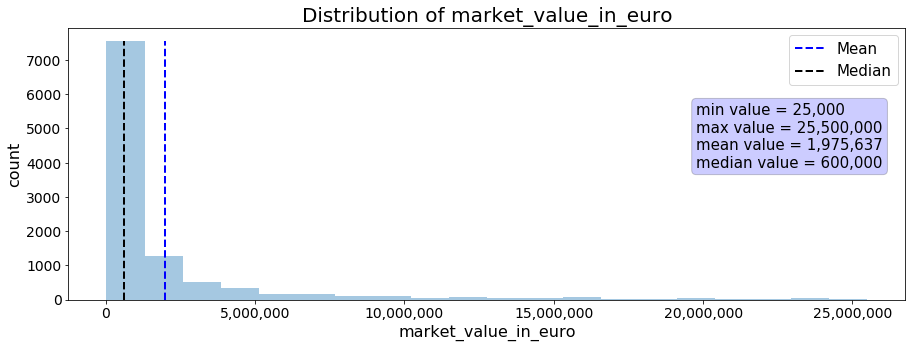

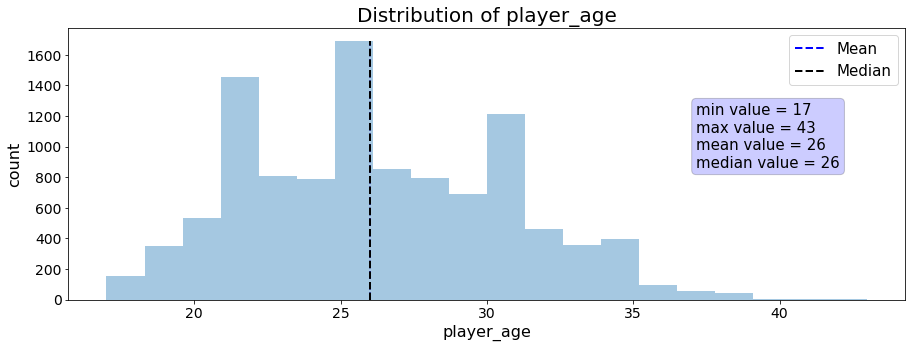

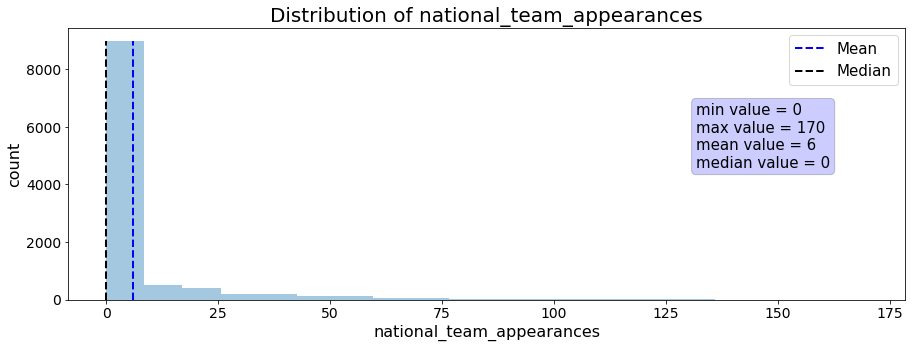

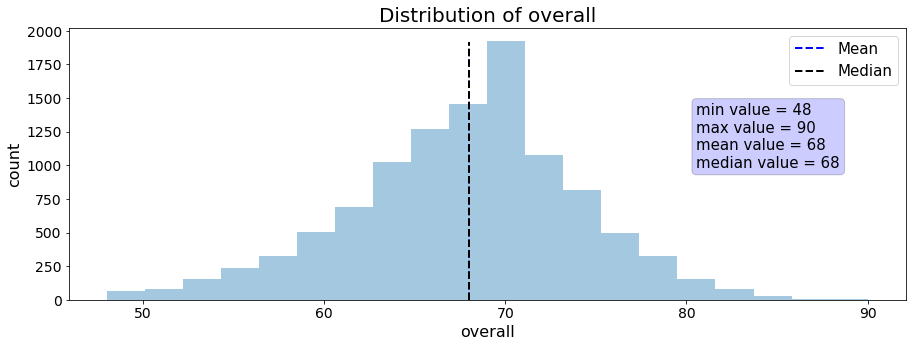

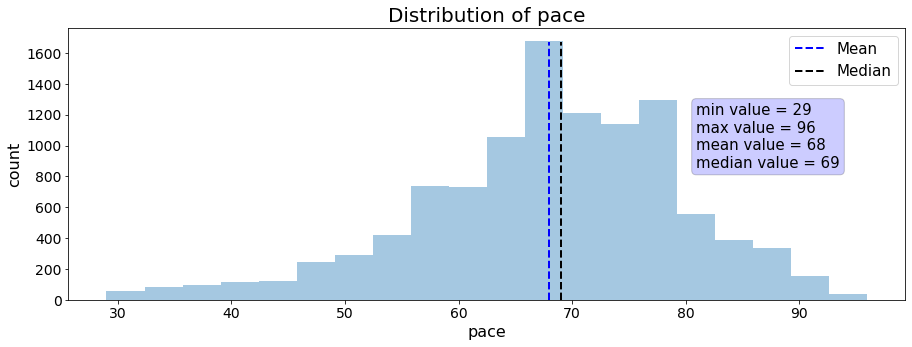

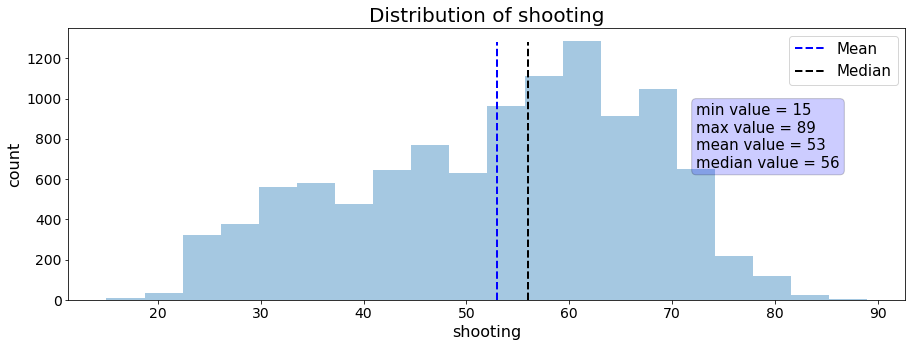

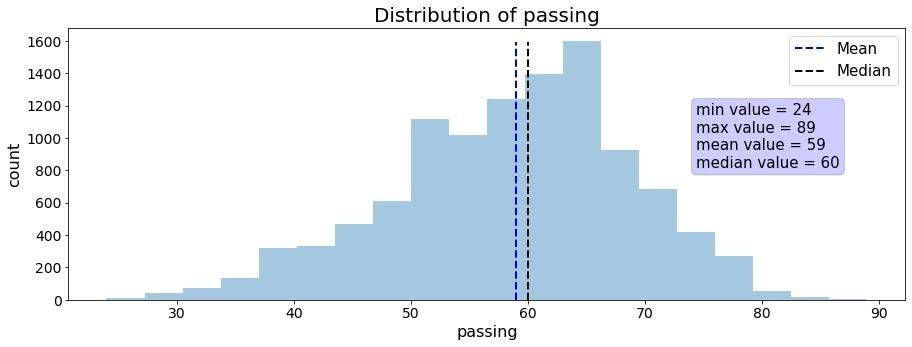

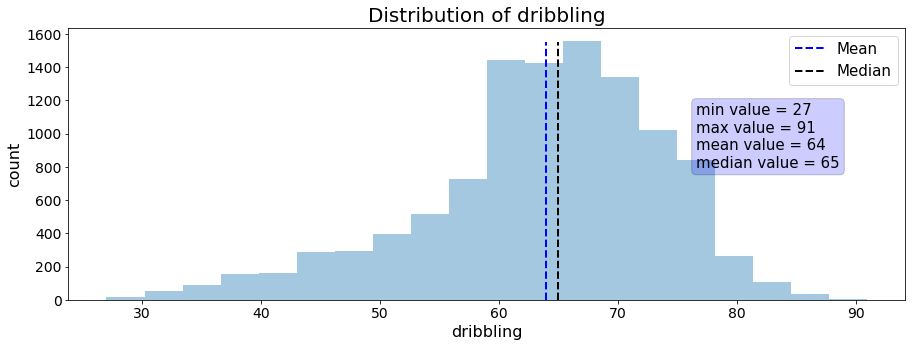

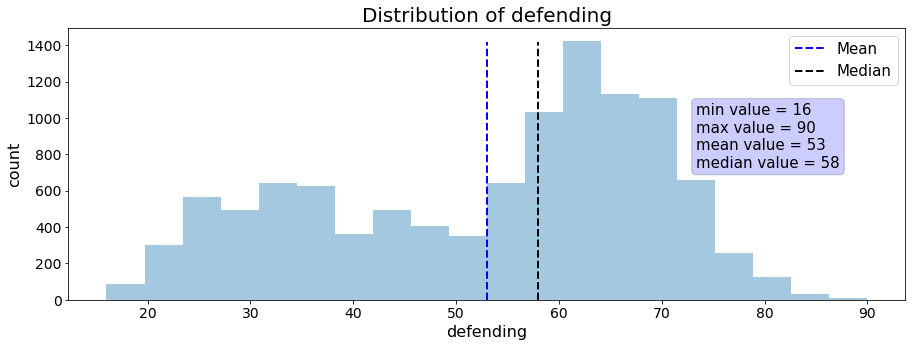

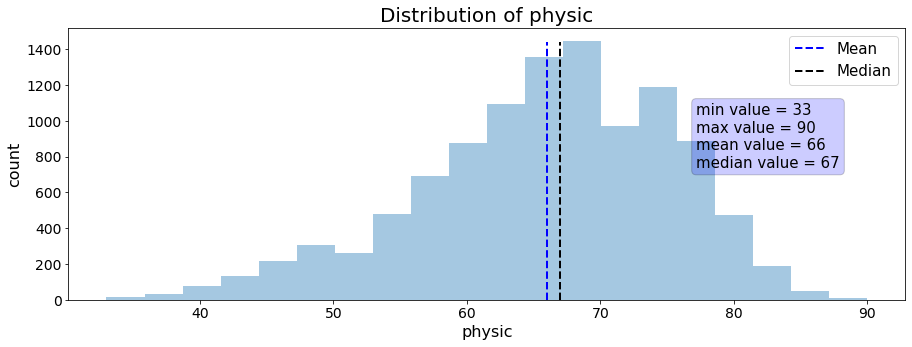

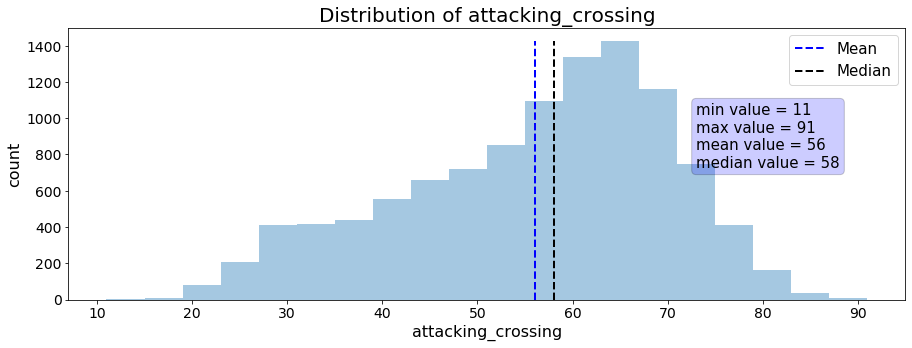

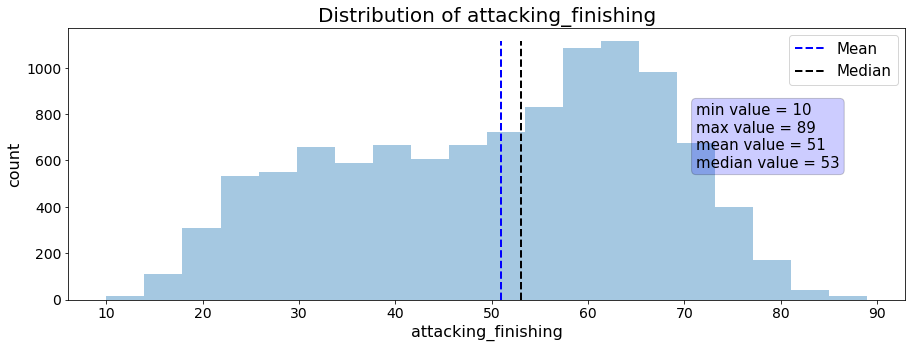

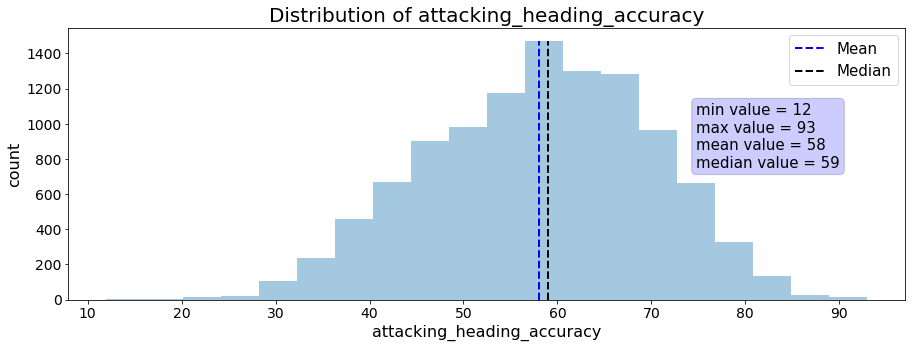

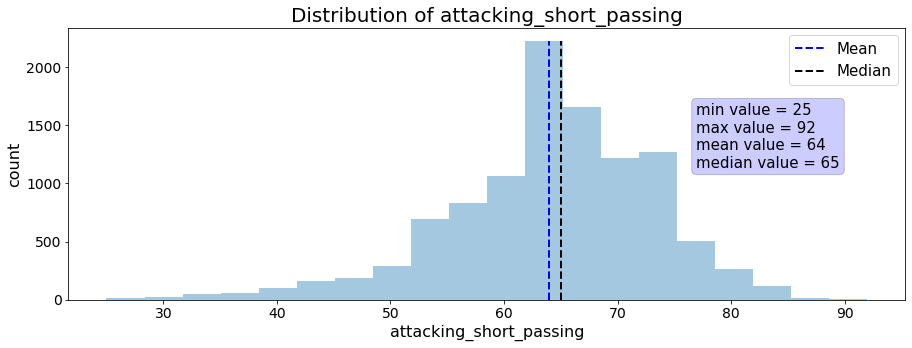

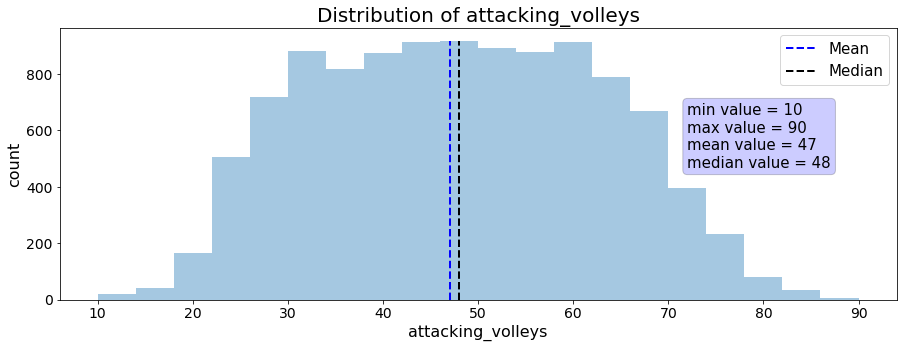

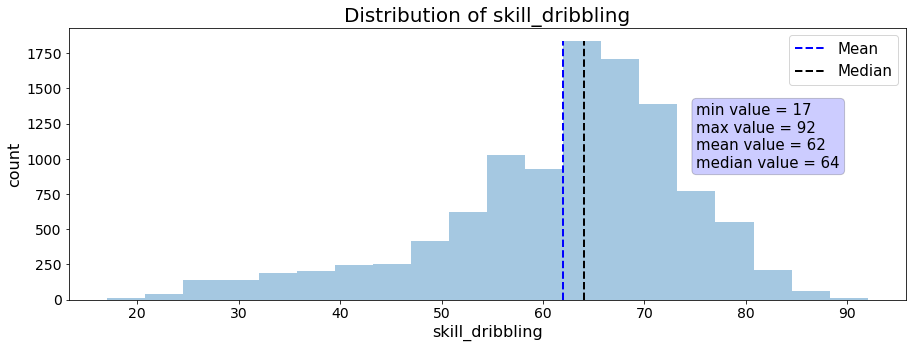

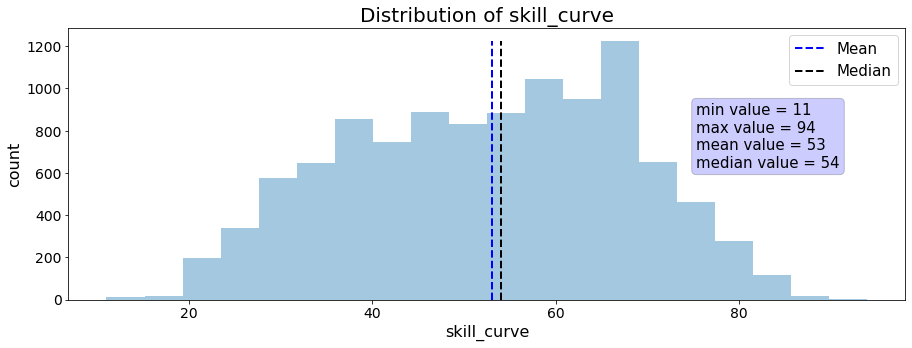

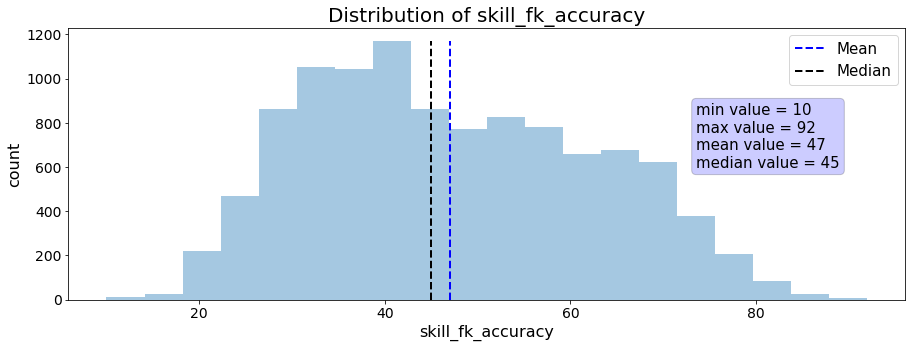

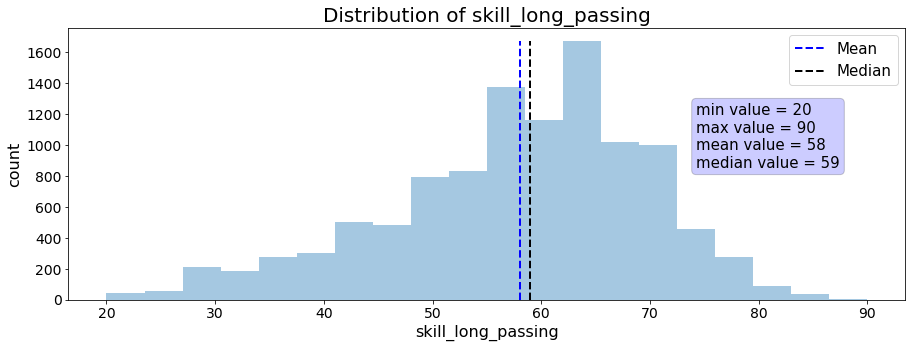

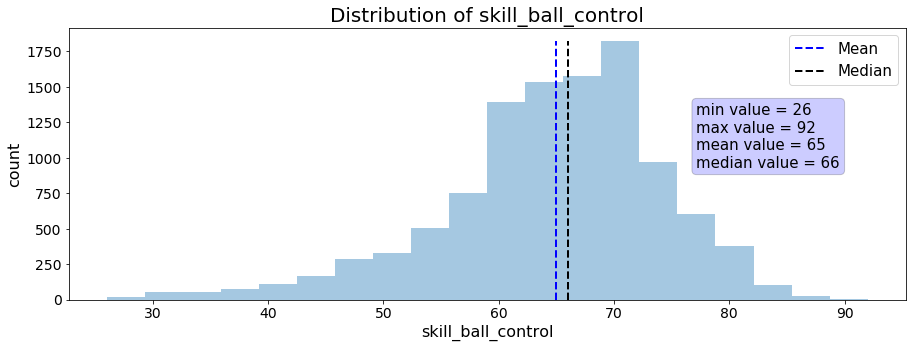

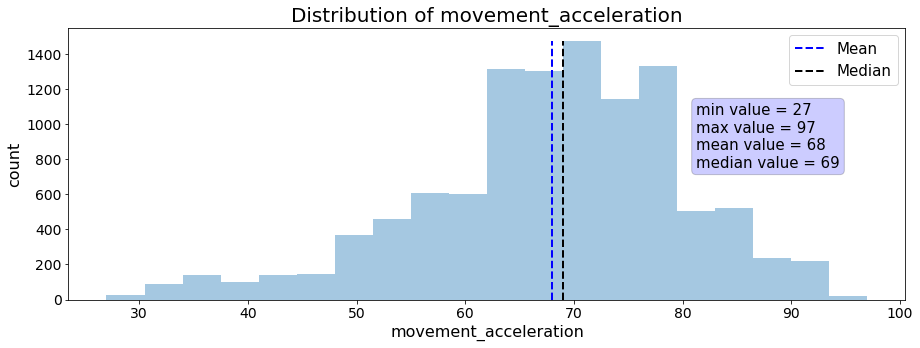

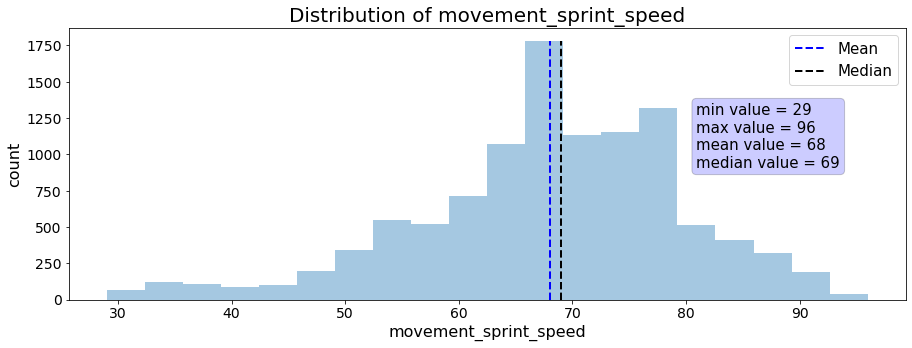

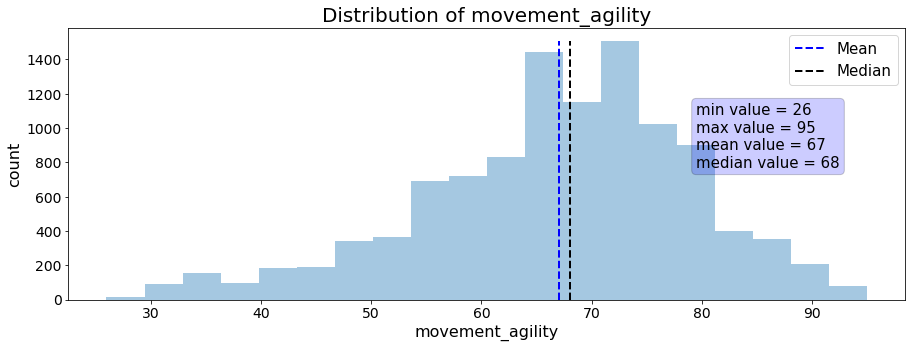

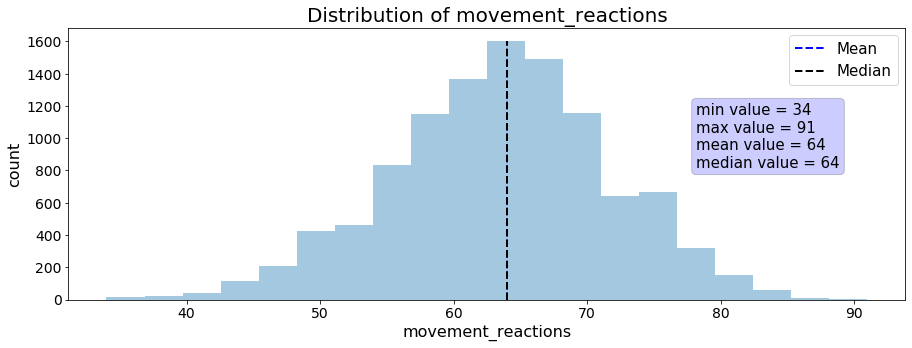

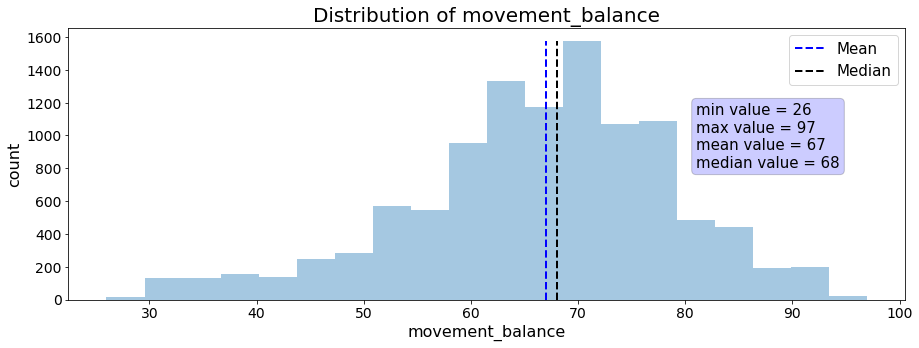

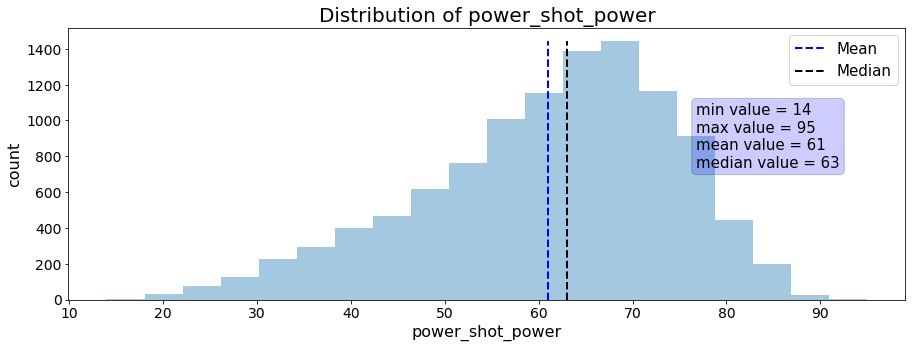

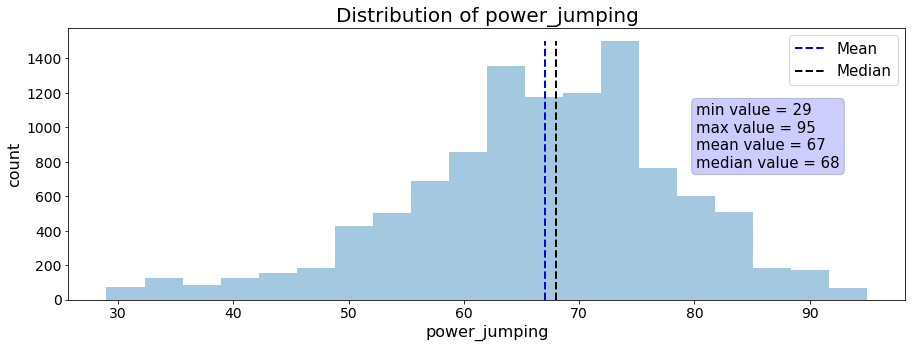

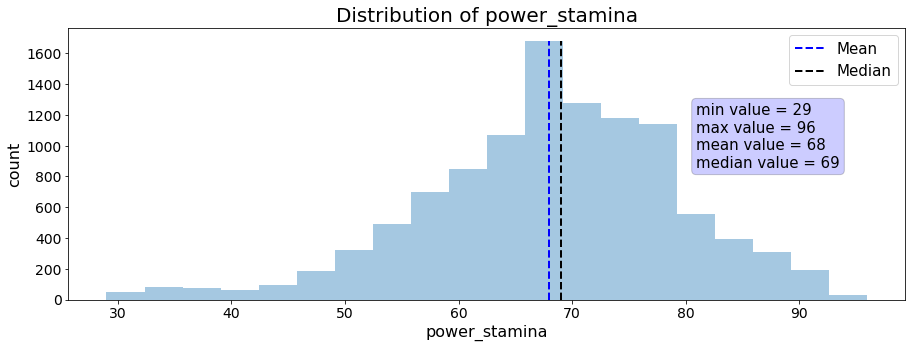

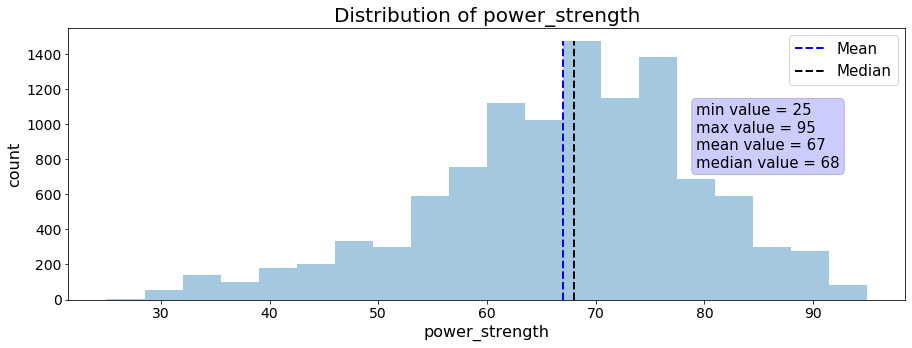

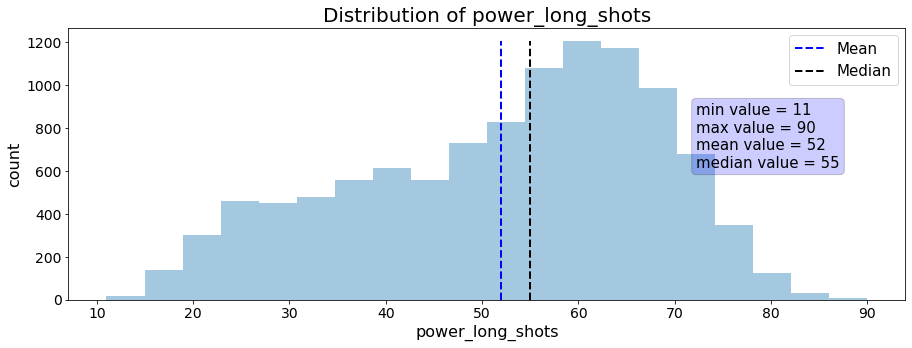

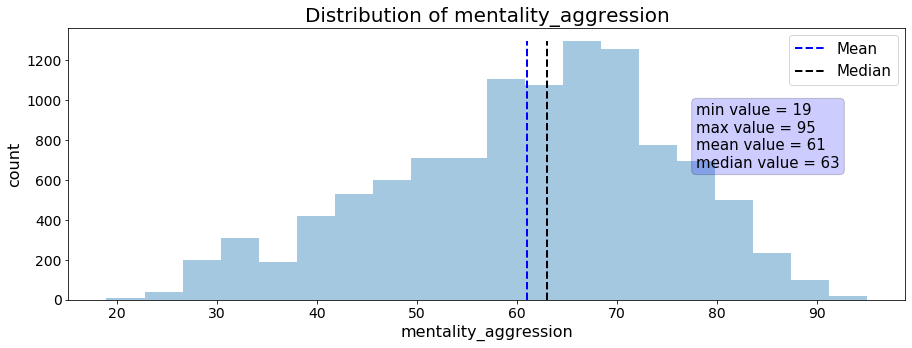

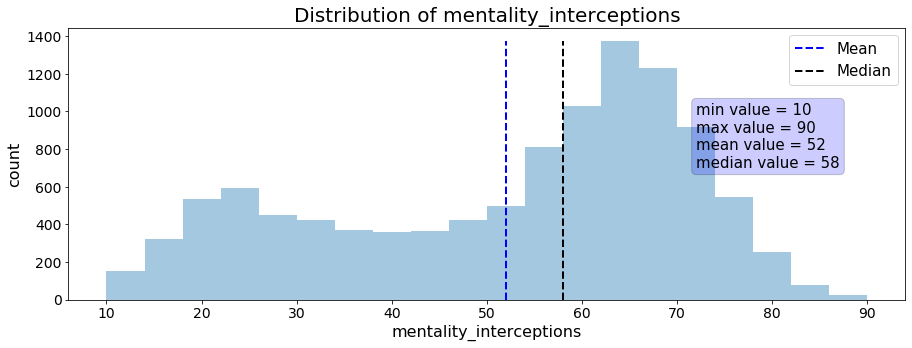

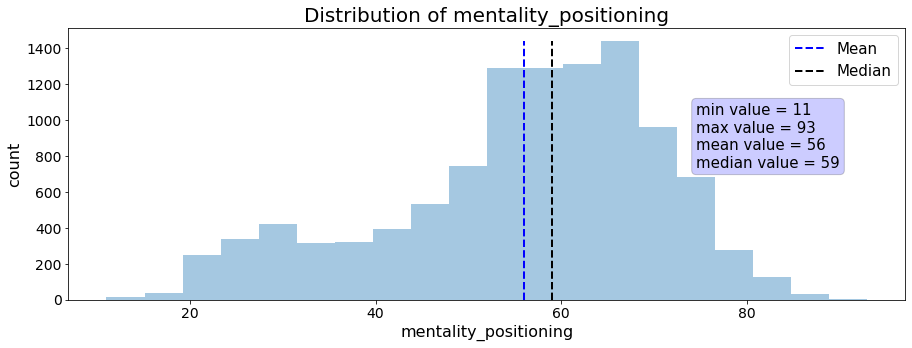

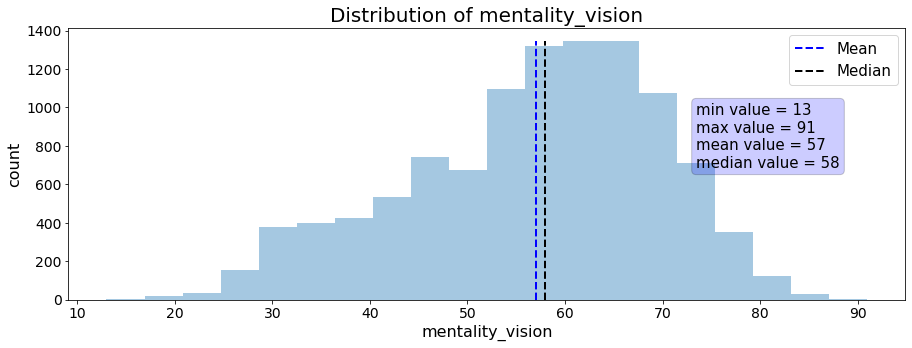

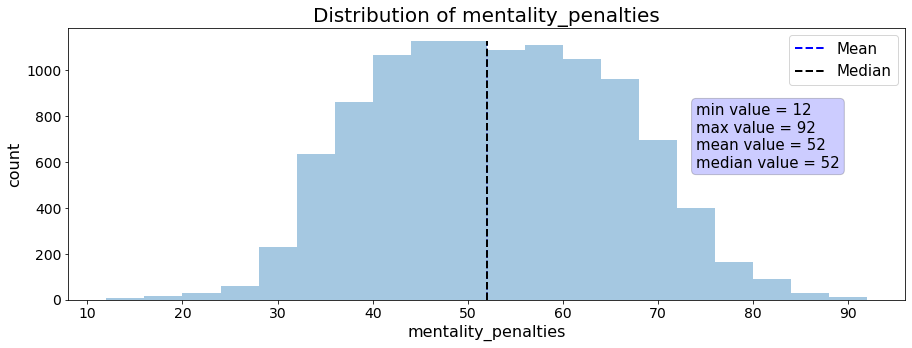

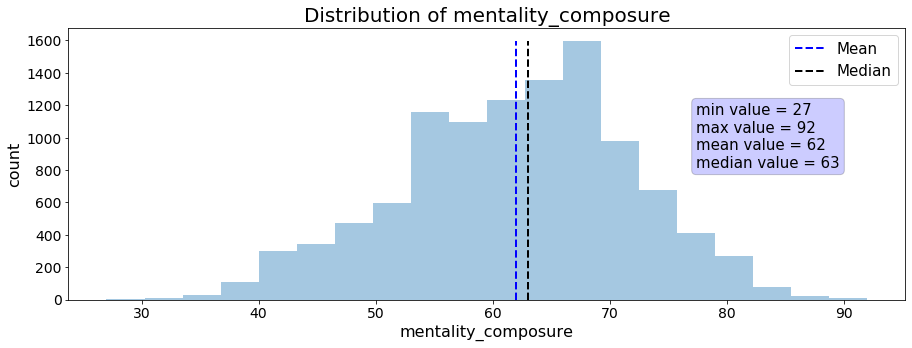

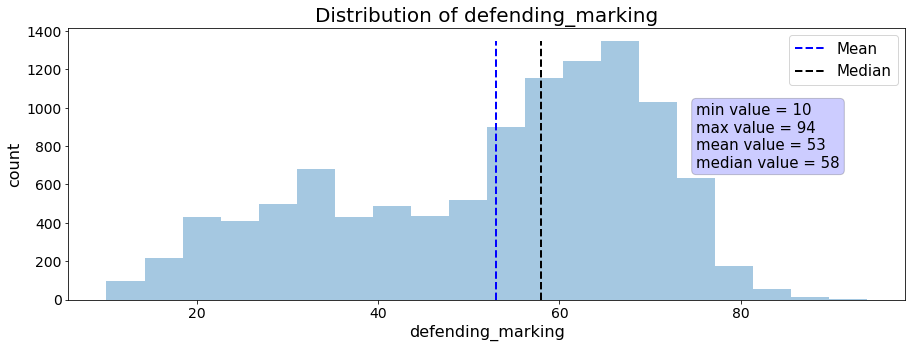

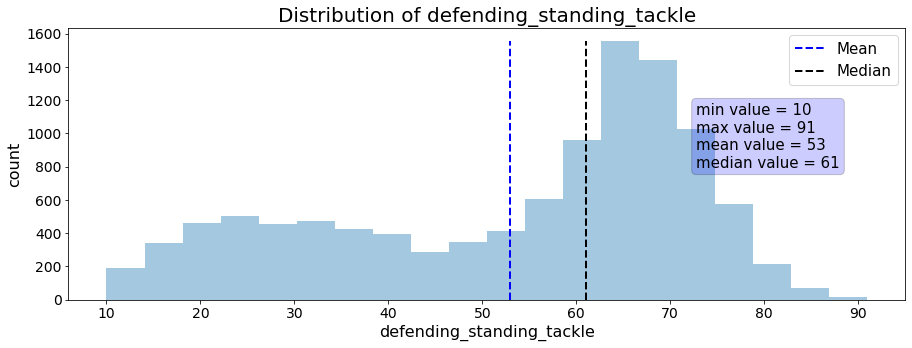

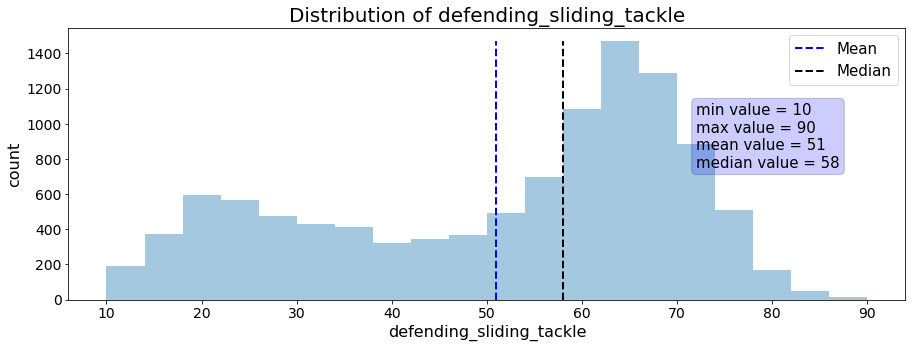

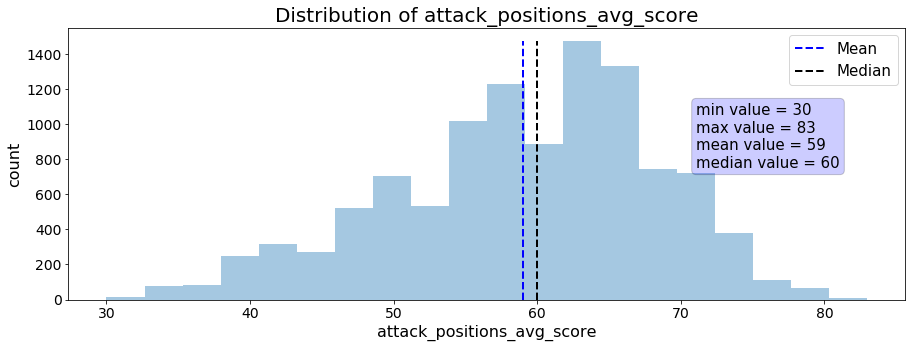

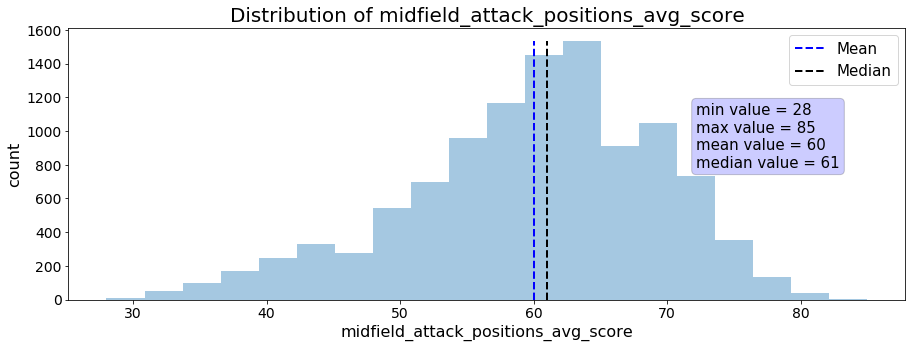

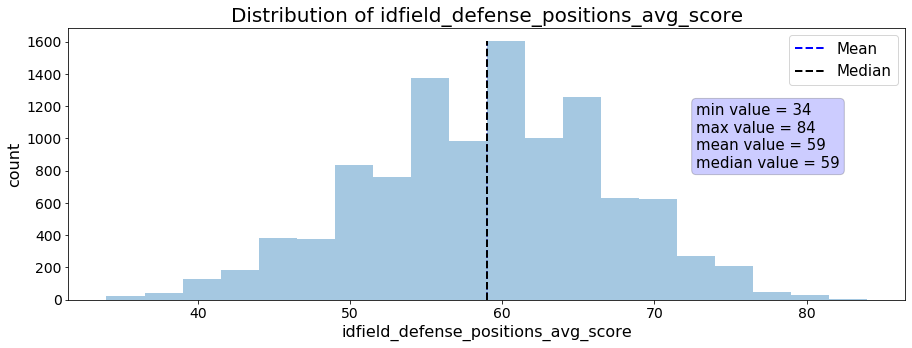

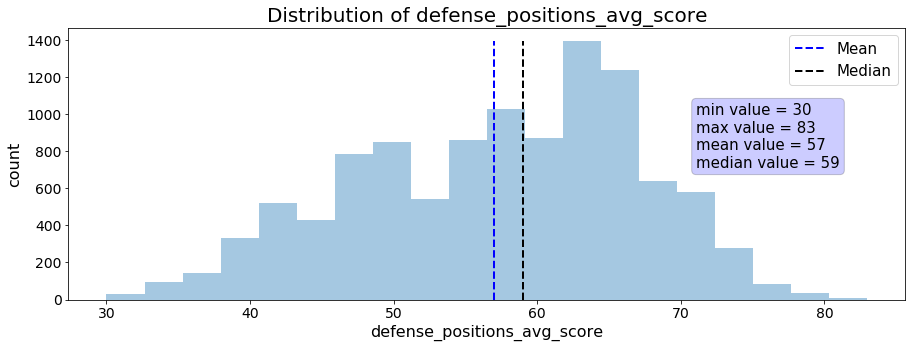

In [16]:
for i in list(df_fp_numerical.columns):
    plot_hist (df_fp_numerical, f"{i}", f"Distribution of {i}")

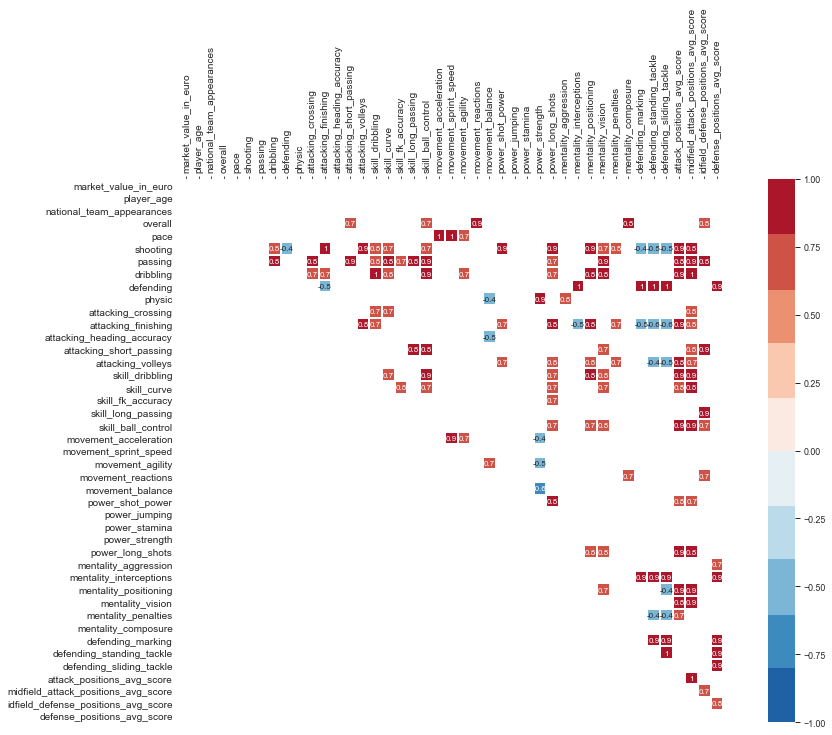

In [17]:
plot_heatmap(df_fp_numerical)

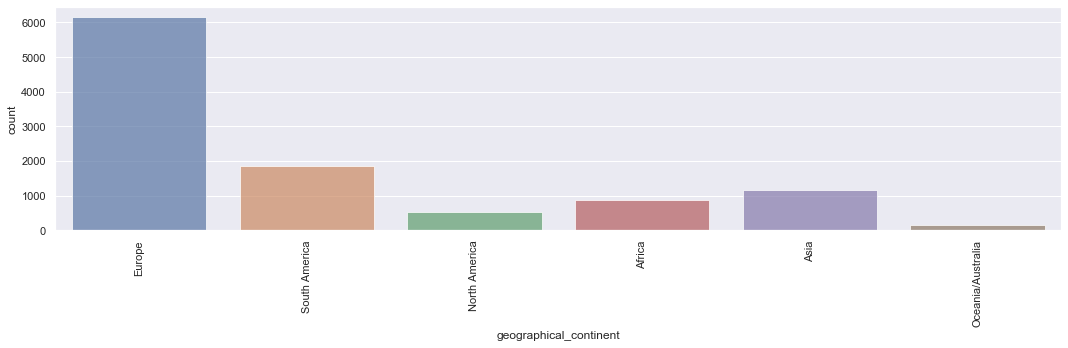

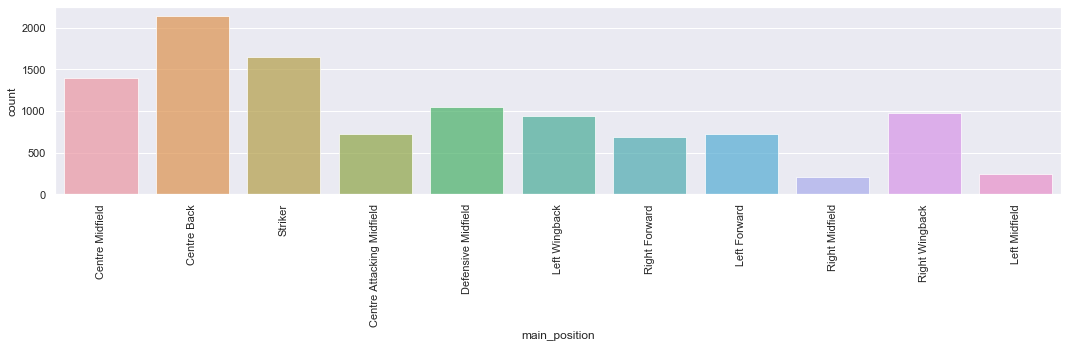

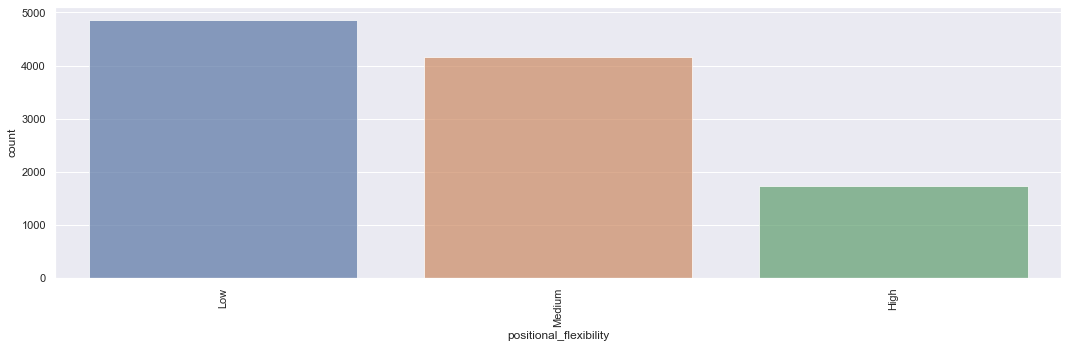

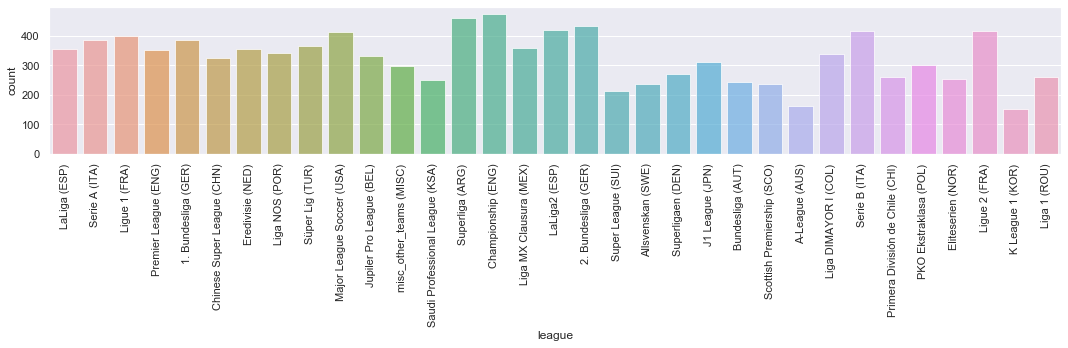

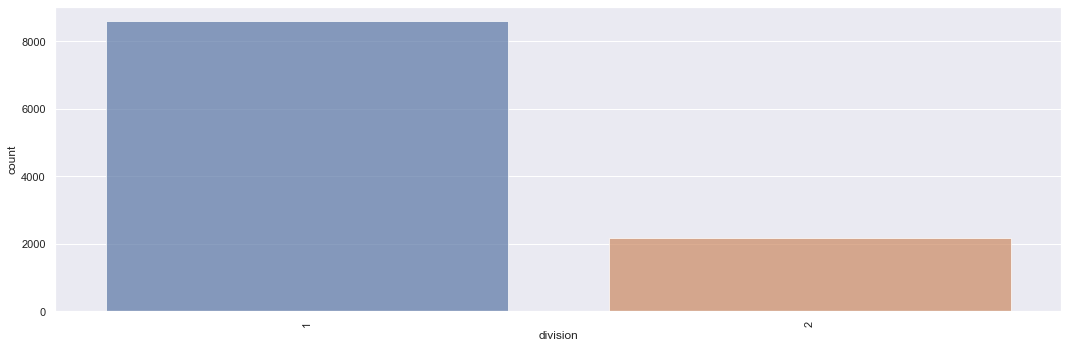

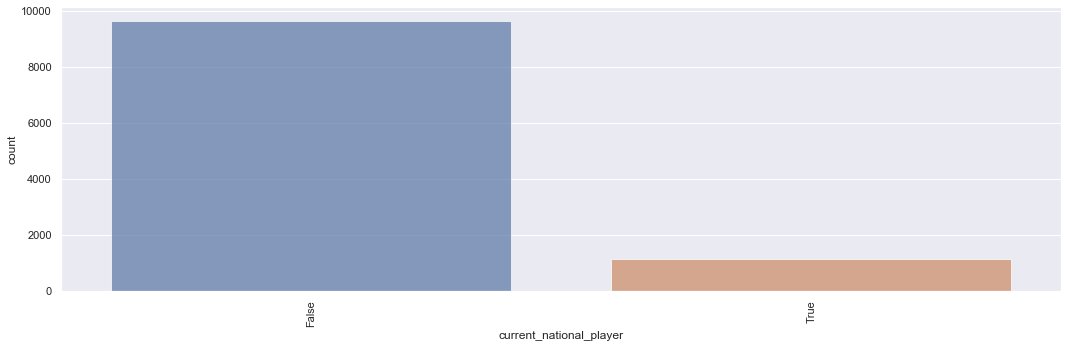

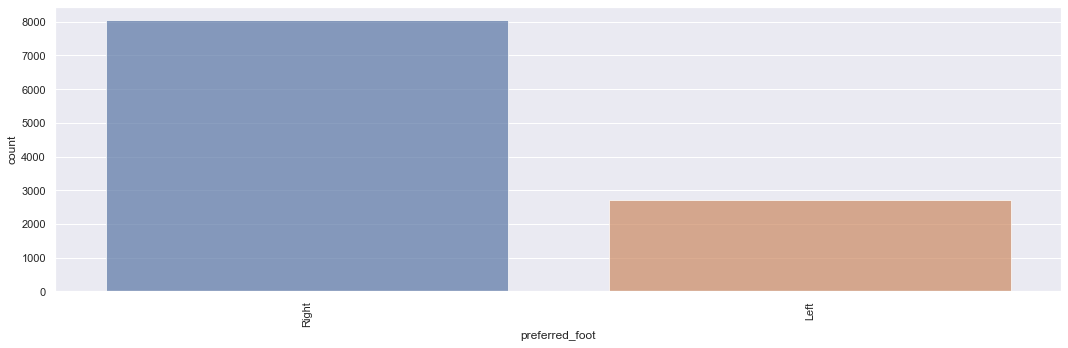

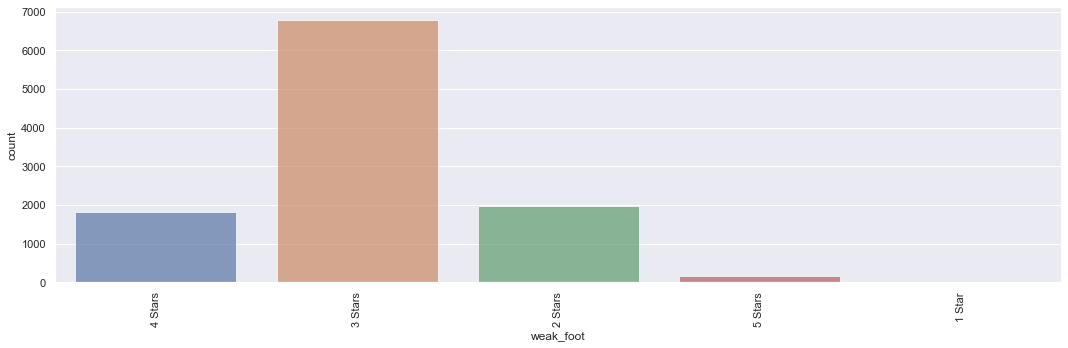

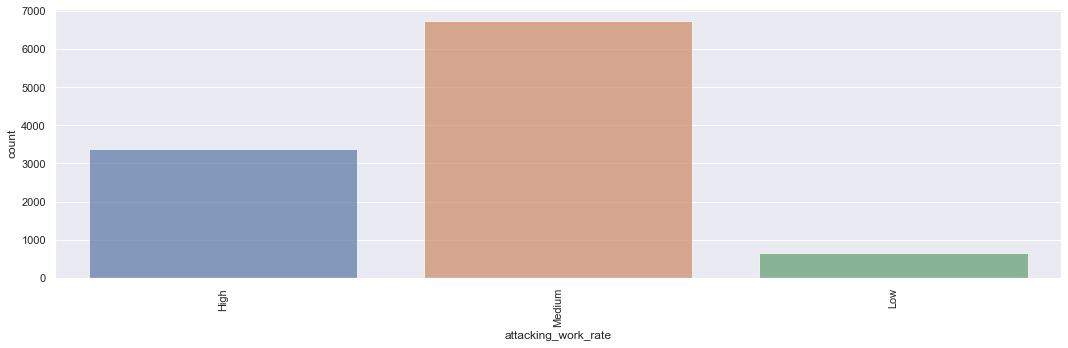

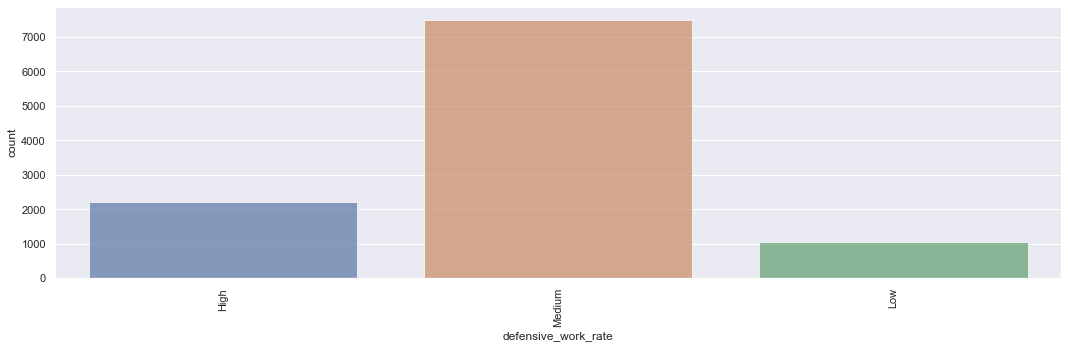

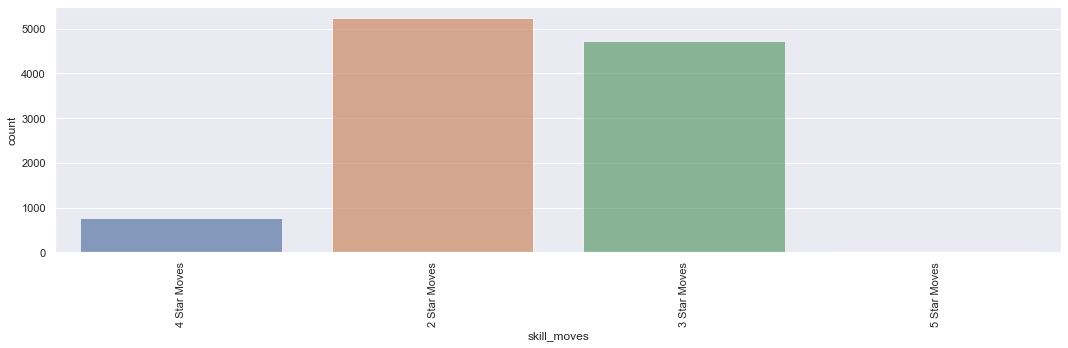

In [18]:
for i in list(df_fp_categorical.columns):
    plot_count_cat (df_fp_categorical, f"{i}")

## Goal Keepers

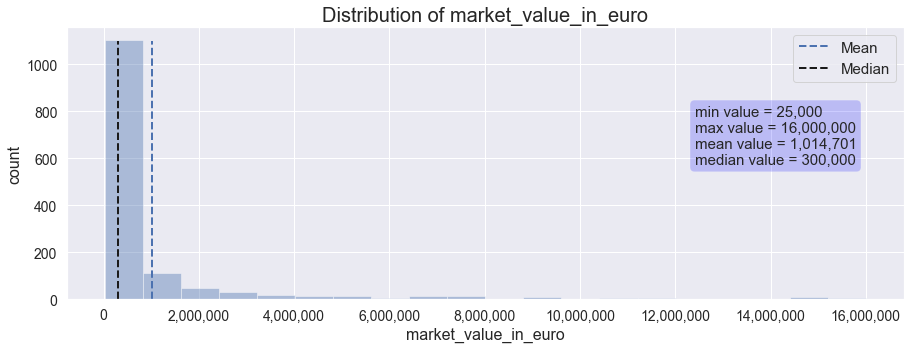

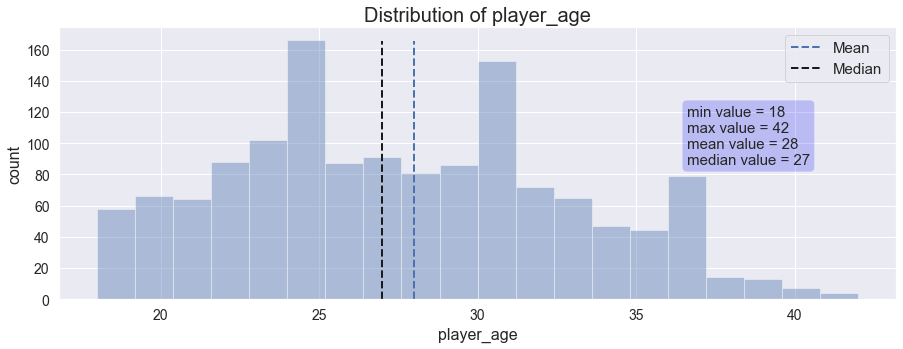

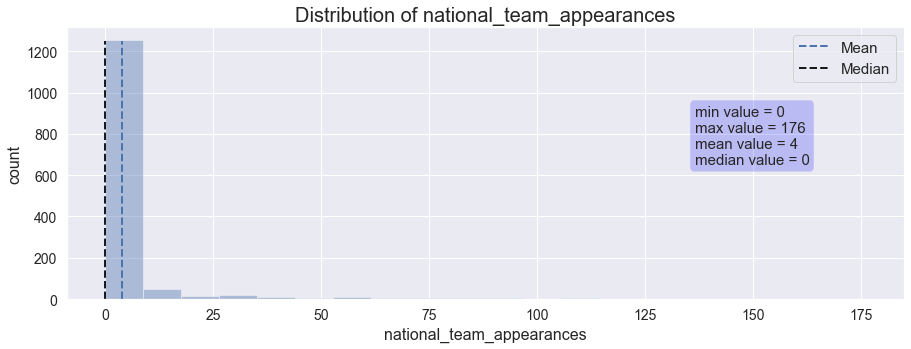

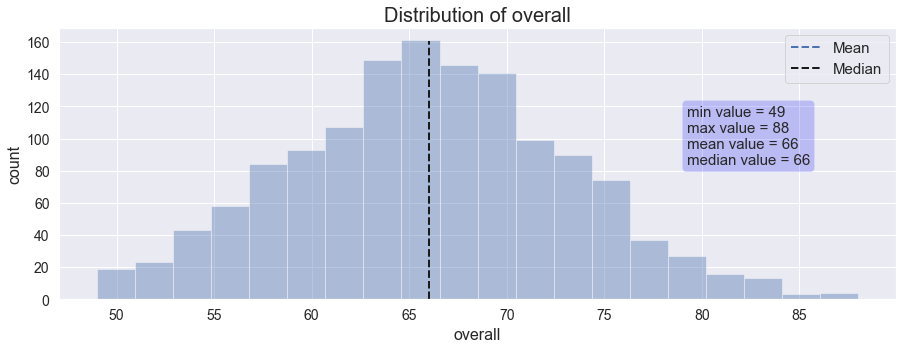

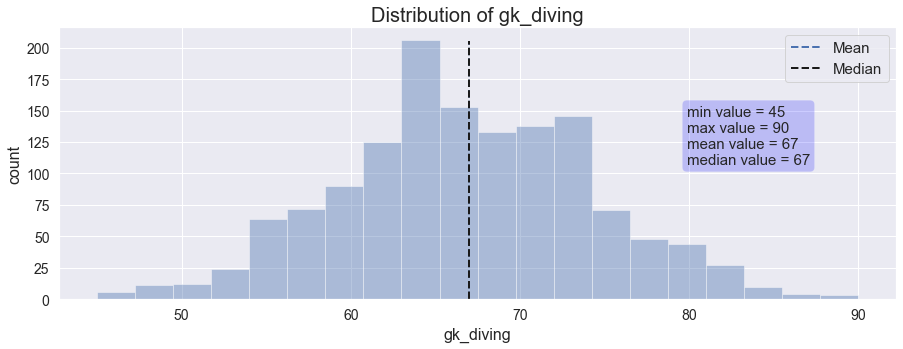

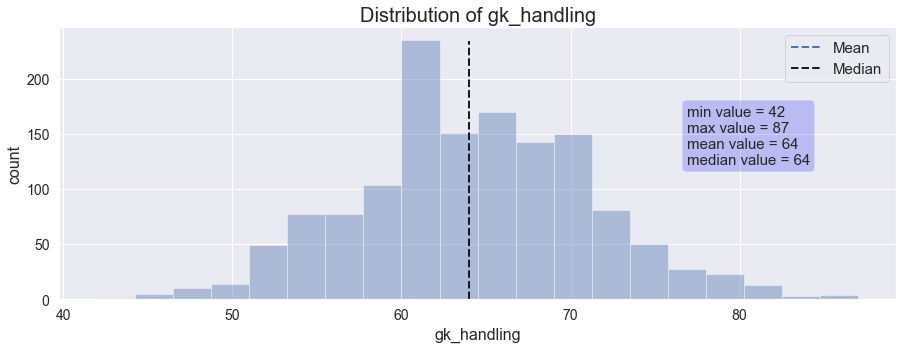

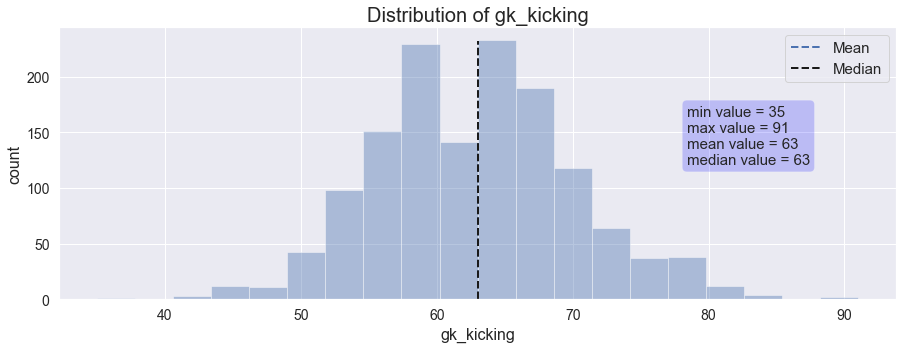

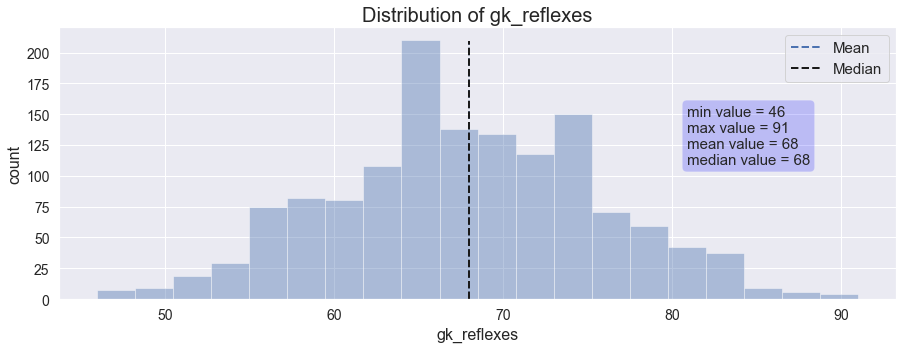

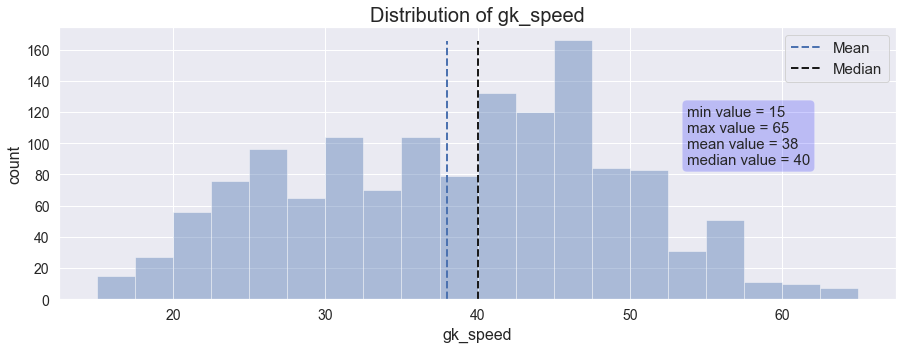

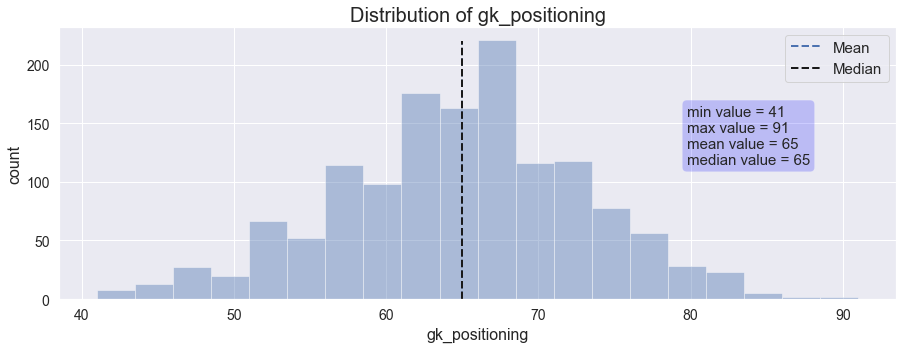

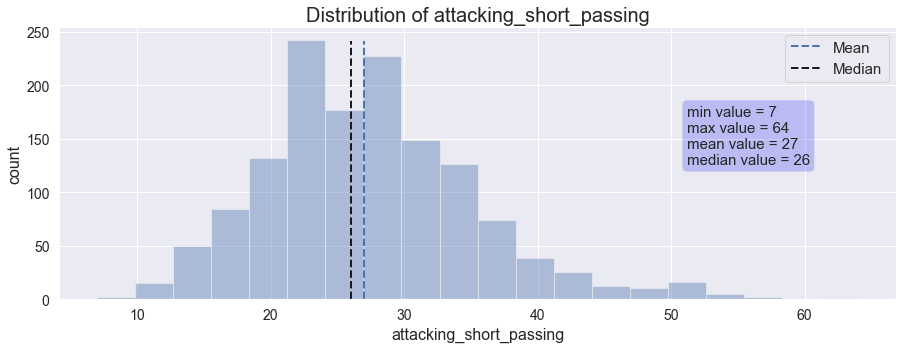

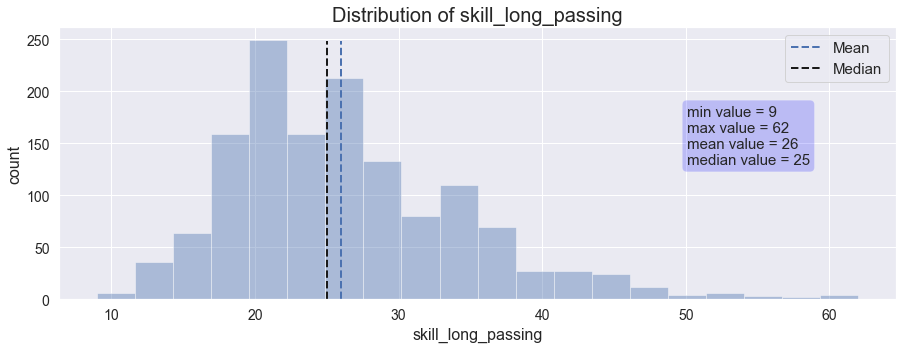

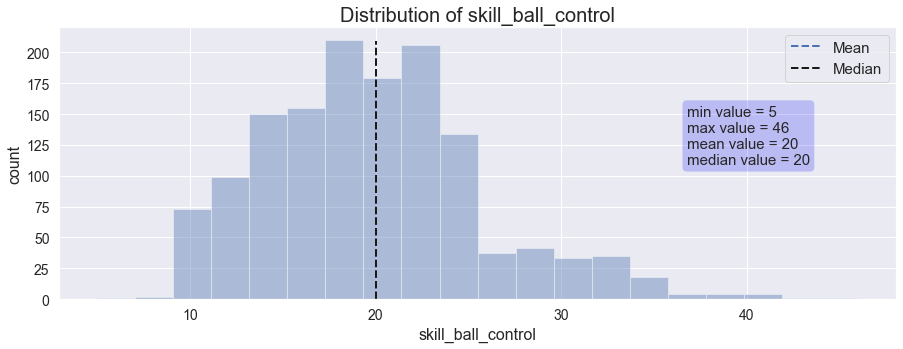

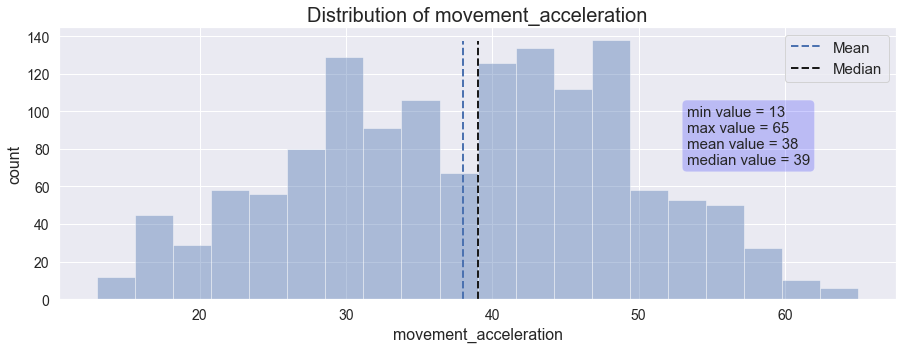

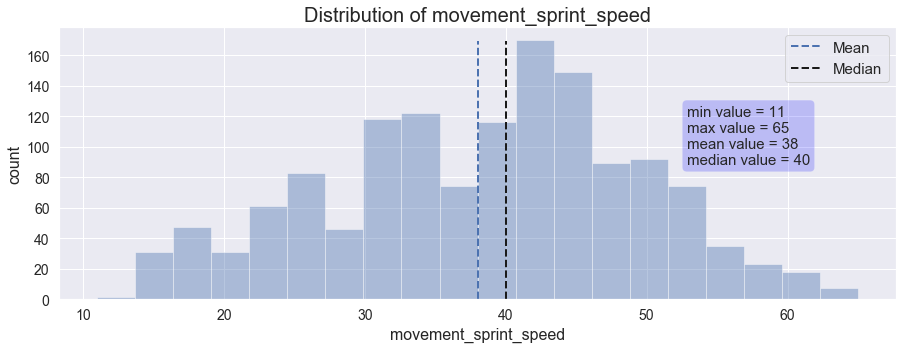

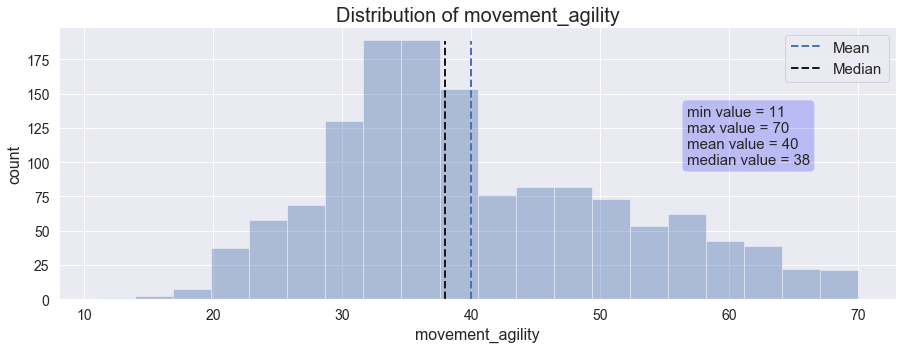

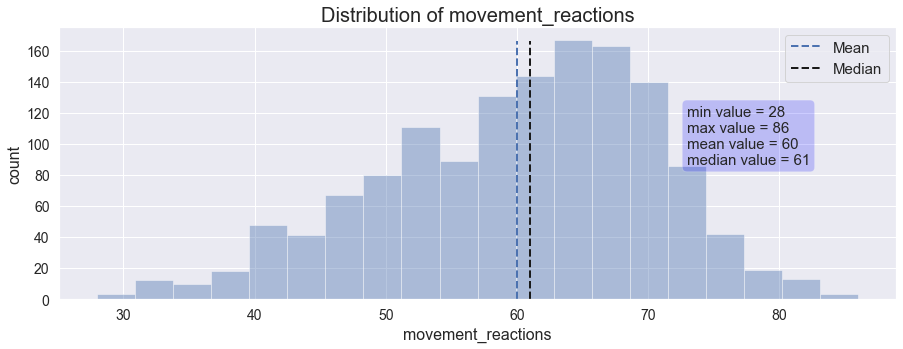

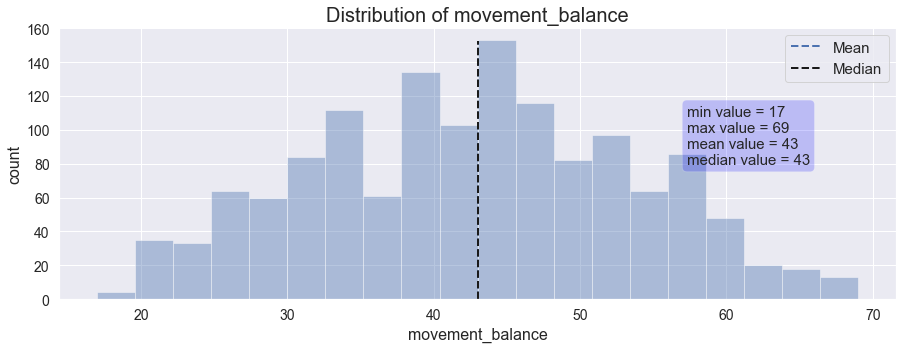

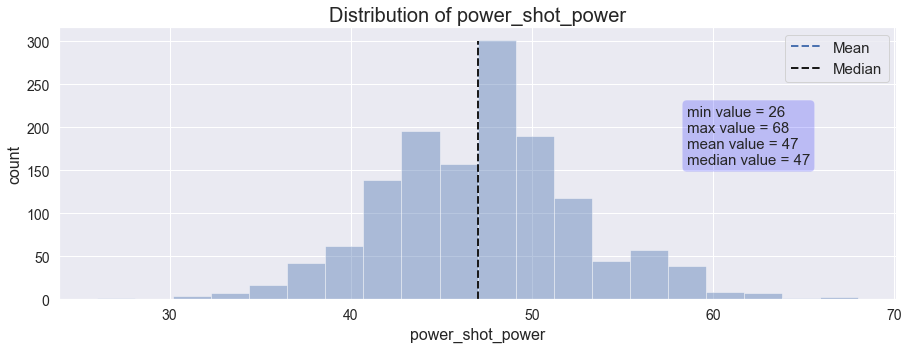

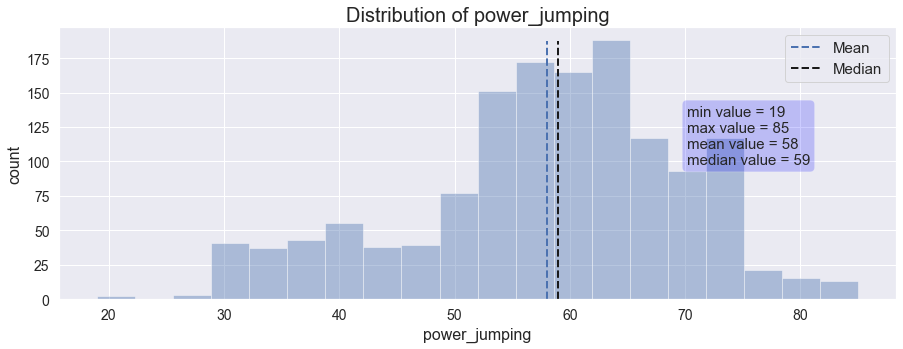

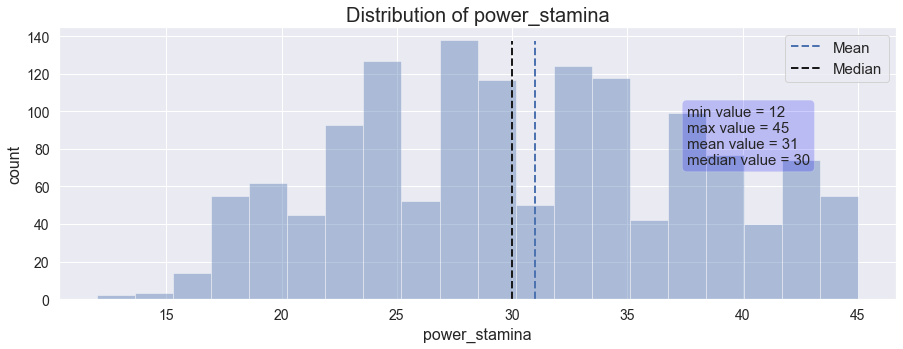

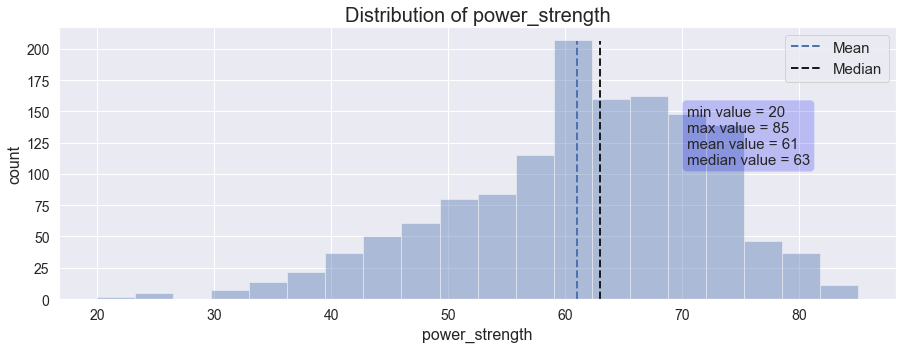

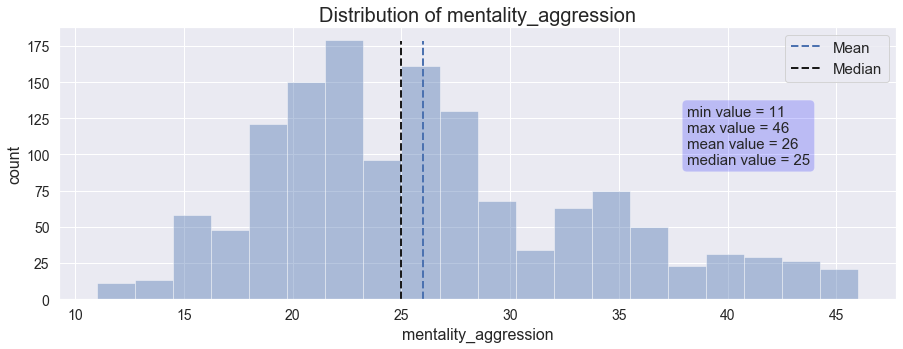

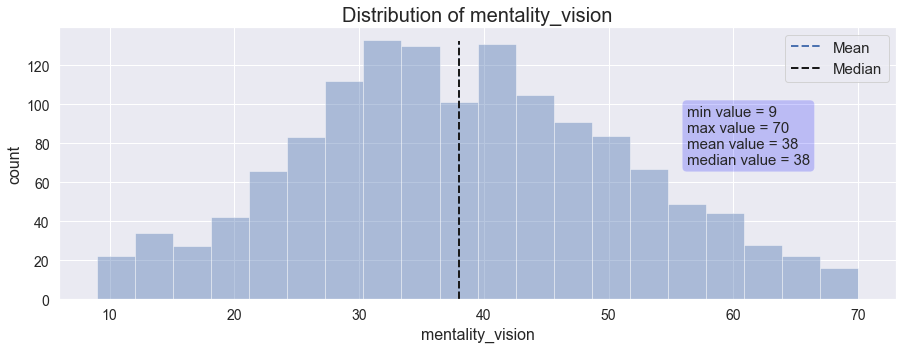

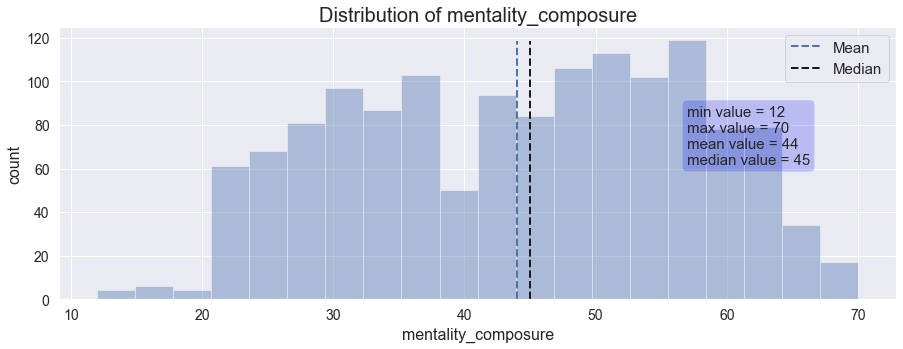

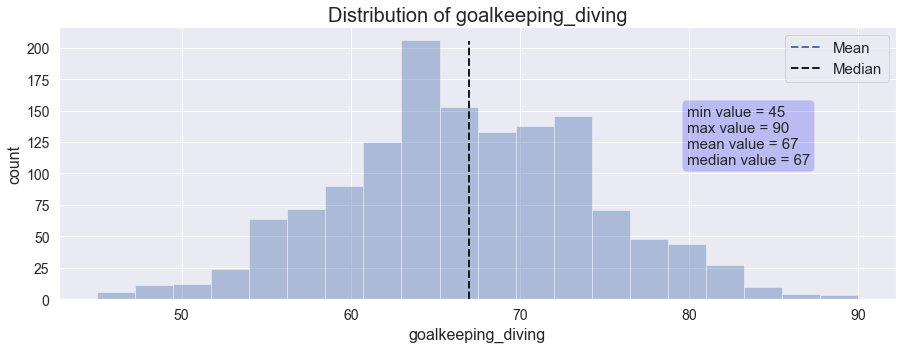

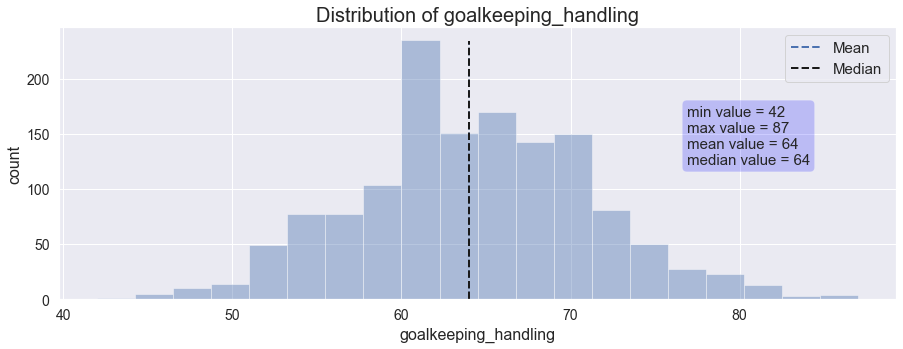

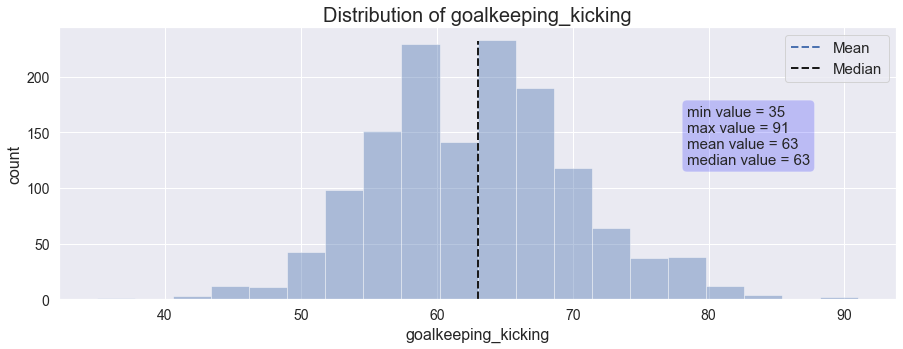

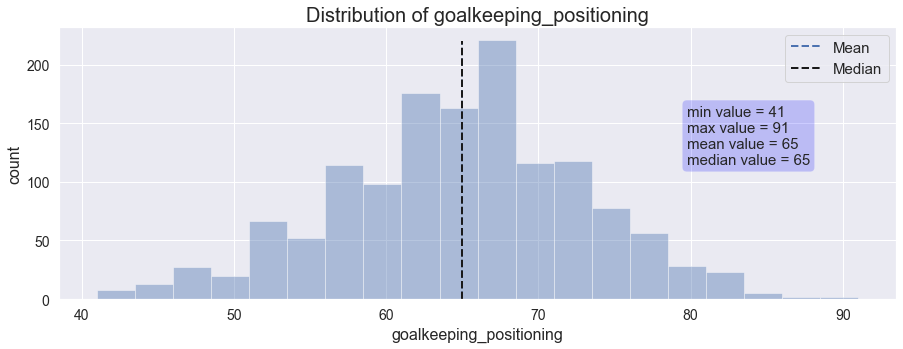

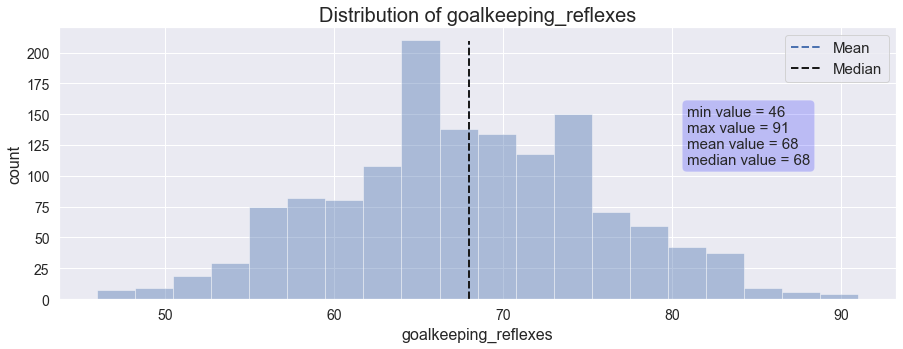

In [19]:
for i in list(df_gk_numerical.columns):
    plot_hist (df_gk_numerical, f"{i}", f"Distribution of {i}")

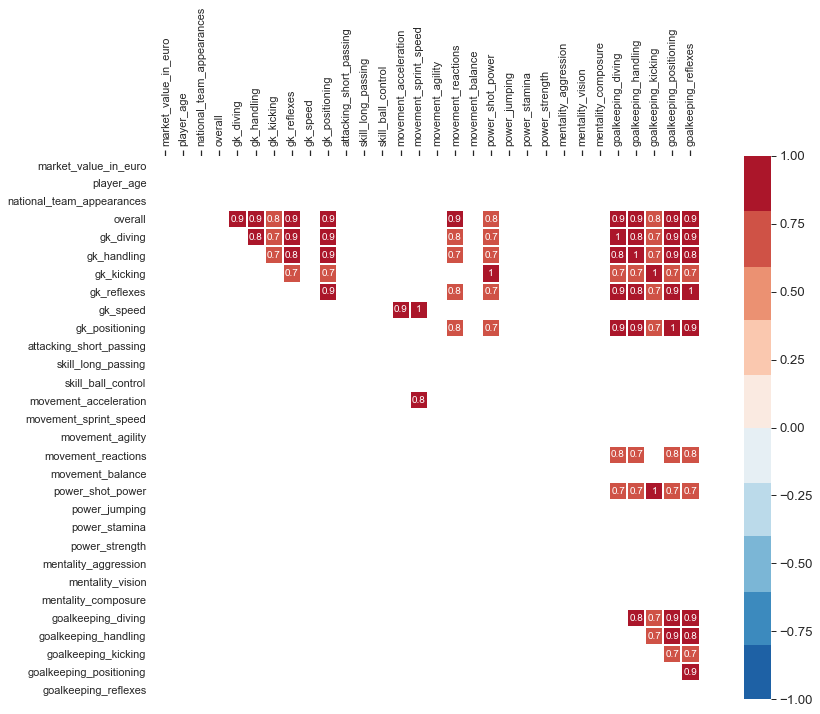

In [20]:
plot_heatmap(df_gk_numerical)

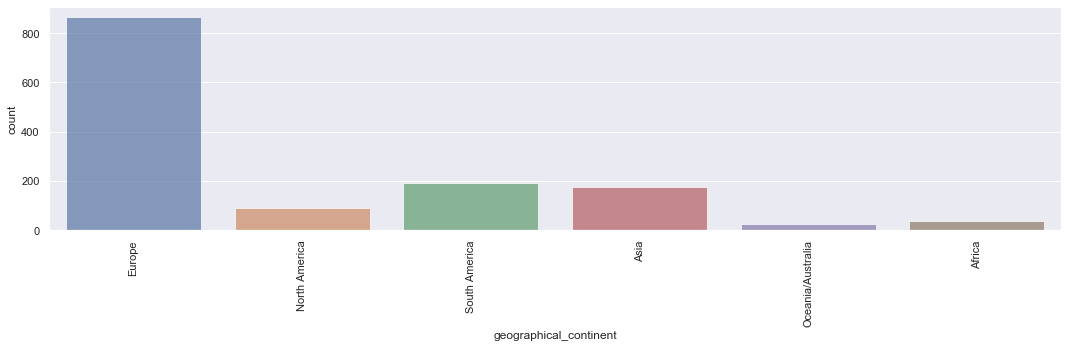

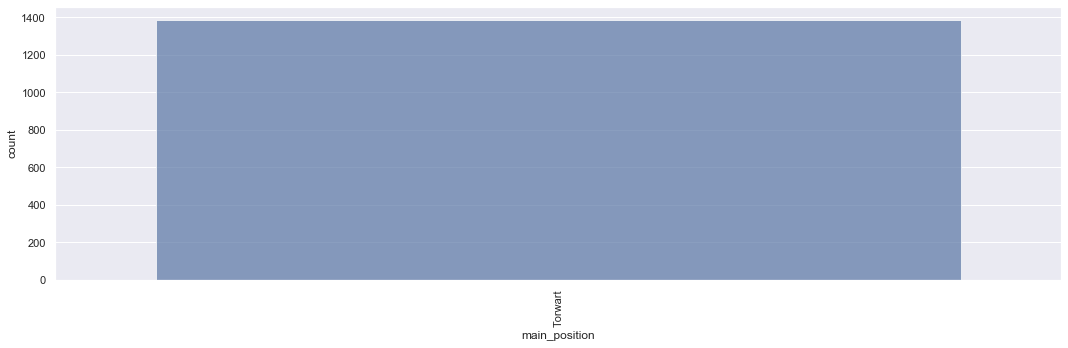

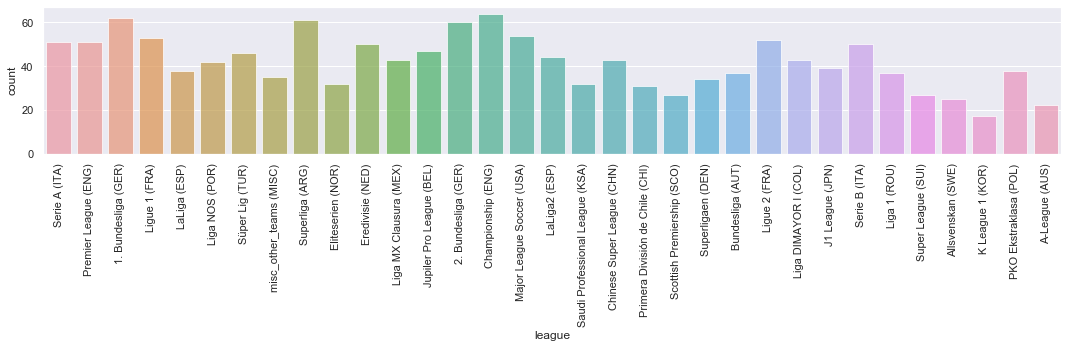

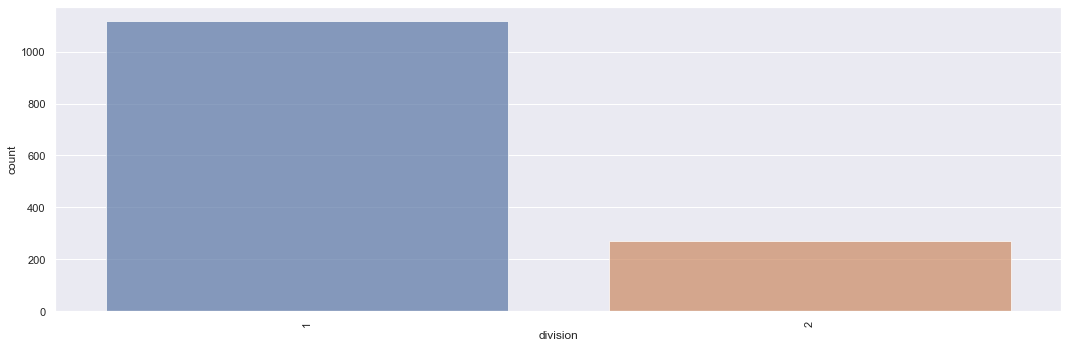

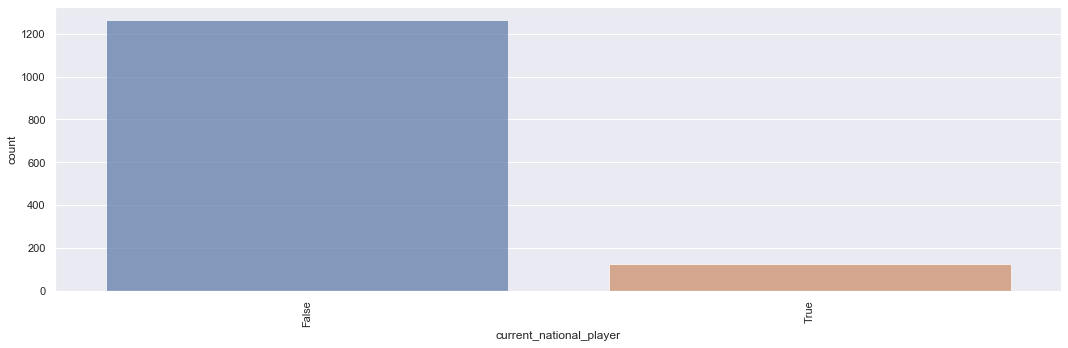

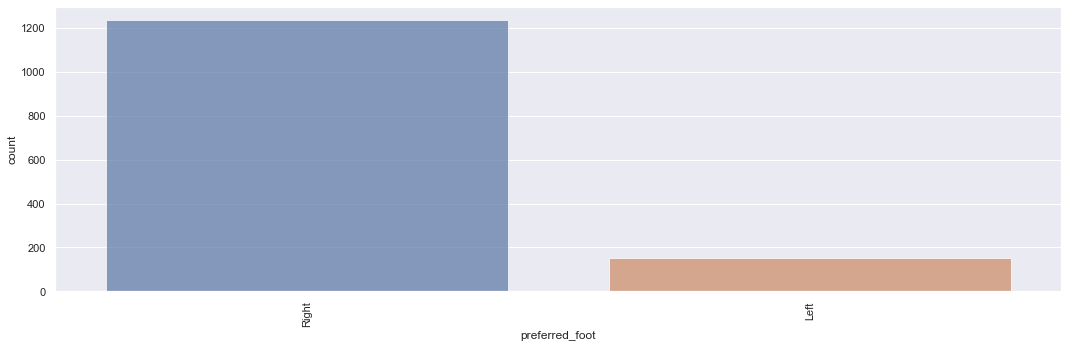

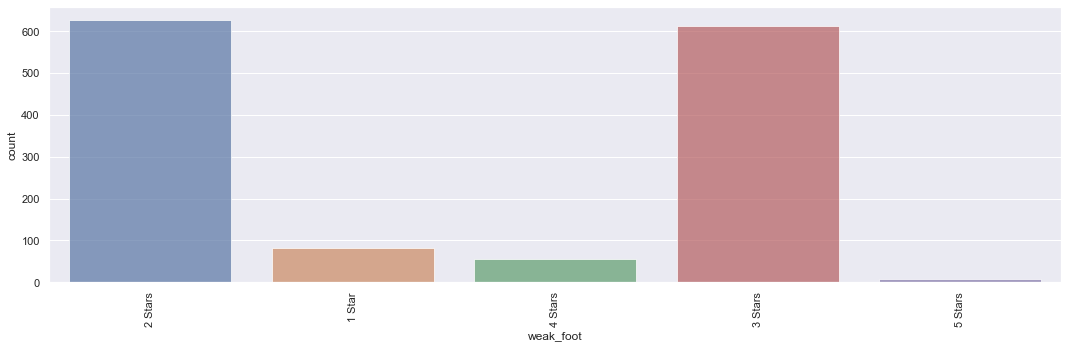

In [21]:
for i in list(df_gk_categorical.columns):
    plot_count_cat (df_gk_categorical, f"{i}")

##### Save

In [22]:
df_fp = df_fp.reset_index(drop=True)
df_gk = df_gk.reset_index(drop=True)
df_fp.to_csv('data/fp_data_final.csv')
df_gk.to_csv('data/gk_data_final.csv')

# Next steps


- build preprocessing pipeline for numerical and categorical vars separately
- several attemps on algos with:
        * only 6 aggregated attributes
        * single attributes